In [1]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from notebook import utils
import pyspark
from pyspark import SparkContext
import pandas as pd
import sys
import os
%matplotlib inline

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable


In [2]:
pd.read_csv('minute_weather.csv')

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587252,1587252,2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,1587253,2014-09-10 23:56:29,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,1587254,2014-09-10 23:57:29,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,1587255,2014-09-10 23:58:29,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


In [3]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("Cluster")
sc = SparkContext.getOrCreate()    
from pyspark.rdd import RDD
sqlContext=SQLContext(sc)
df = sqlContext.read.load('minute_weather.csv',format='com.databricks.spark.csv',header='true',inferSchema='true' )
  
# pip

c:\Users\mandaladitya236\Desktop\clusterAnalysis\venv\lib\site-packages\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
# Context(sc)
# df=sqlContext.read.load('minutsc=SparkContext().getOrCreate()
# sqlContext=SQLe_weather.csv',format='com.databricks.spark.com',header='true',inferSchema='true')

In [5]:
df.count()

1587257

In [6]:
# df=sqlContext.read.option('header','true').csv('minute_weather.csv')

In [7]:
 filteredDF=df.filter((df.rowID%10)==0)
 filteredDF.count()

158726

In [8]:
filteredDF.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
rowID,158726,793625.0,458203.9375103623,0,1587250
hpwren_timestamp,158726,None,None,2011-09-10 00:00:49,2014-09-10 23:53:29
air_pressure,158726,916.8301614102413,3.051716552830777,905.0,929.5
air_temp,158726,61.851589153636084,11.833569210641707,31.64,99.5
avg_wind_direction,158680,162.15610032770354,95.27820101905918,0.0,359.0
avg_wind_speed,158680,2.7752148979077367,2.057623969742644,0.0,31.9
max_wind_direction,158680,163.46214393748426,92.45213853838698,0.0,359.0
max_wind_speed,158680,3.400557726241551,2.4188016208098855,0.1,36.0
min_wind_direction,158680,166.77401688933702,97.44110914784568,0.0,359.0


In [9]:
filteredDF.filter(filteredDF.rain_accumulation == 0.0).count()
#values of rain accumulation is zero

157812

In [10]:
filteredDF.filter(filteredDF.rain_duration == 0.0).count()
#values of rain duration is zero

157237

In [11]:
workingDF=filteredDF.drop('rain_accumulation').drop('rain_duration').drop('hpwren_timestamp').show()

+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+
|rowID|air_pressure|air_temp|avg_wind_direction|avg_wind_speed|max_wind_direction|max_wind_speed|min_wind_direction|min_wind_speed|relative_humidity|
+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+
|    0|       912.3|   64.76|              97.0|           1.2|             106.0|           1.6|              85.0|           1.0|             60.5|
|   10|       912.3|   62.24|             144.0|           1.2|             167.0|           1.8|             115.0|           0.6|             38.5|
|   20|       912.2|   63.32|             100.0|           2.0|             122.0|           2.5|              91.0|           1.5|             58.3|
|   30|       912.2|    62.6|              91.0|           2.0|             103.0|           2.4|   

In [13]:
before=workingDF.count()
workingDF=workingDF.na.drop()
after=workingDF.count()
before -after

AttributeError: 'NoneType' object has no attribute 'count'

In [14]:
workingDF.columns


AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
workingDF.printSchema()

root
 |-- rowID: integer (nullable = true)
 |-- air_pressure: double (nullable = true)
 |-- air_temp: double (nullable = true)
 |-- avg_wind_direction: double (nullable = true)
 |-- avg_wind_speed: double (nullable = true)
 |-- max_wind_direction: double (nullable = true)
 |-- max_wind_speed: double (nullable = true)
 |-- min_wind_direction: double (nullable = true)
 |-- min_wind_speed: double (nullable = true)
 |-- relative_humidity: double (nullable = true)



In [ ]:
from pyspark.sql.functions import col
# workingDF=workingDF.withColumn("air_pressure",col("air_pressure").cast("double"))
# workingDF=workingDF.withColumn("air_temp",col("air_temp").cast("double"))
# workingDF=workingDF.withColumn("avg_wind_direction",col("avg_wind_direction").cast("double"))
# workingDF=workingDF.withColumn("avg_wind_speed",col("avg_wind_speed").cast("double"))
# workingDF=workingDF.withColumn("max_wind_direction",col("max_wind_direction").cast("double"))
# workingDF=workingDF.withColumn("max_wind_speed",col("max_wind_speed").cast("double"))
# workingDF=workingDF.withColumn("min_wind_speed",col("min_wind_speed").cast("double"))
# workingDF=workingDF.withColumn("min_wind_direction",col("min_wind_direction").cast("double"))
# workingDF=workingDF.withColumn("relative_humidity",col("relative_humidity").cast("double"))
# workingDF=workingDF.withColumn("rowID",col("rowID").cast("double"))

In [ ]:
workingDF.printSchema()

root
 |-- rowID: integer (nullable = true)
 |-- air_pressure: double (nullable = true)
 |-- air_temp: double (nullable = true)
 |-- avg_wind_direction: double (nullable = true)
 |-- avg_wind_speed: double (nullable = true)
 |-- max_wind_direction: double (nullable = true)
 |-- max_wind_speed: double (nullable = true)
 |-- min_wind_direction: double (nullable = true)
 |-- min_wind_speed: double (nullable = true)
 |-- relative_humidity: double (nullable = true)



In [ ]:
featuresUsed=['air_pressure','air_temp','avg_wind_direction','avg_wind_speed','max_wind_direction','max_wind_speed','relative_humidity']
assembler=VectorAssembler(inputCols=featuresUsed,outputCol="features_unscaled")
assembled=assembler.transform(workingDF)

In [ ]:
#Using Standard Scaler to Scale the Data
scaler=StandardScaler(inputCol="features_unscaled", outputCol="features",withStd=True, withMean=True)
scalerModel=scaler.fit(assembled)
scaledData=scalerModel.transform(assembled)

In [ ]:
scaledData=scaledData.select("features","rowID")
elbowset=scaledData.filter((scaledData.rowID % 3)==0).select("features")
elbowset.persist()

DataFrame[features: vector]

In [ ]:
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)
def elbow(elbowset, clusters):
	wsseList = []	
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList
def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
clusters=range(2,31)
wsseList=elbow(elbowset,clusters)

Training for cluster size 2 


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 886.0 failed 1 times, most recent failure: Lost task 2.0 in stage 886.0 (TID 5414) (mandaladitya236 executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:166)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:108)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:121)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:162)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(ProcessImpl.java:453)
	at java.lang.ProcessImpl.start(ProcessImpl.java:140)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 15 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2352)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2351)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2351)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1109)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1109)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1109)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2591)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2533)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2522)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:898)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2254)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2279)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:166)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:108)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:121)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:162)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(ProcessImpl.java:453)
	at java.lang.ProcessImpl.start(ProcessImpl.java:140)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 15 more


In [ ]:
scaledDataFeat=scaledData.select("features")
scaledDataFeat.persist()

DataFrame[features: vector]

In [ ]:
kmeans=KMeans(k=12,seed=1)
model=kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

In [ ]:
centers=model.clusterCenters()
centers

[array([-1.25780361, -1.34777313,  0.38113428,  1.54798342,  0.48870872,
         1.52672966,  1.44243757]),
 array([-0.17864337,  0.69588949,  0.28443268, -0.40546746,  0.44128038,
        -0.42242637, -0.3822184 ]),
 array([-0.62583922,  0.29446191, -1.12160785, -0.62184343, -0.9872638 ,
        -0.64942549,  0.06781479]),
 array([ 1.18225683, -0.3553033 , -1.14849104,  2.71267382, -1.05705926,
         2.83527612, -1.1340859 ]),
 array([ 0.23435387,  0.31444308,  1.88825651, -0.65088048, -1.54944593,
        -0.57517102, -0.27958085]),
 array([ 0.2984676 ,  0.68246496,  1.35060228, -0.64221491,  1.61707318,
        -0.59397374, -0.688285  ]),
 array([ 1.20905817, -0.09280855, -1.12215411,  0.9891463 , -1.01080655,
         1.06493824, -1.0591806 ]),
 array([-0.48491474,  0.24260748,  0.43414506,  1.12438181,  0.52966081,
         1.05878316,  0.05945657]),
 array([ 1.45777164, -0.20709285, -0.93507121, -0.47426982, -0.7646462 ,
        -0.46973205, -0.89457066]),
 array([-0.18807571

In [ ]:
p=pd_centers(featuresUsed,centers)

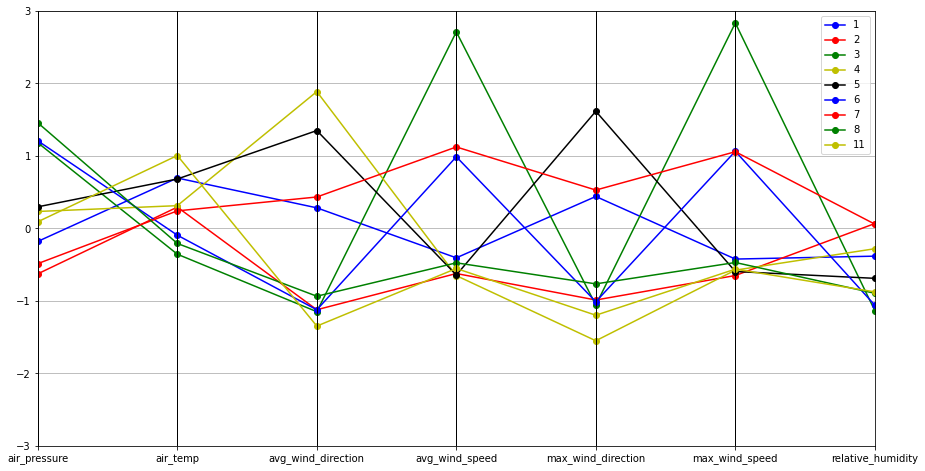

In [ ]:
parallel_plot(p[p['relative_humidity']<=0.5],p)

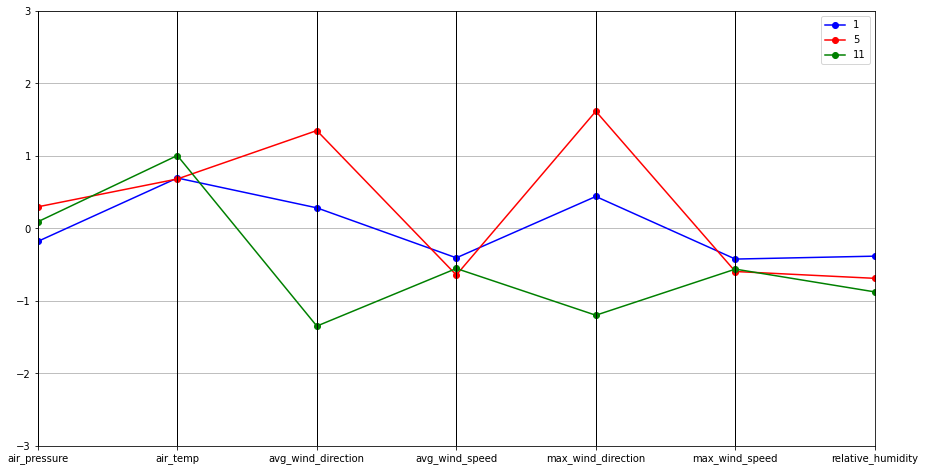

In [ ]:
parallel_plot(p[p['air_temp']>0.5],p)


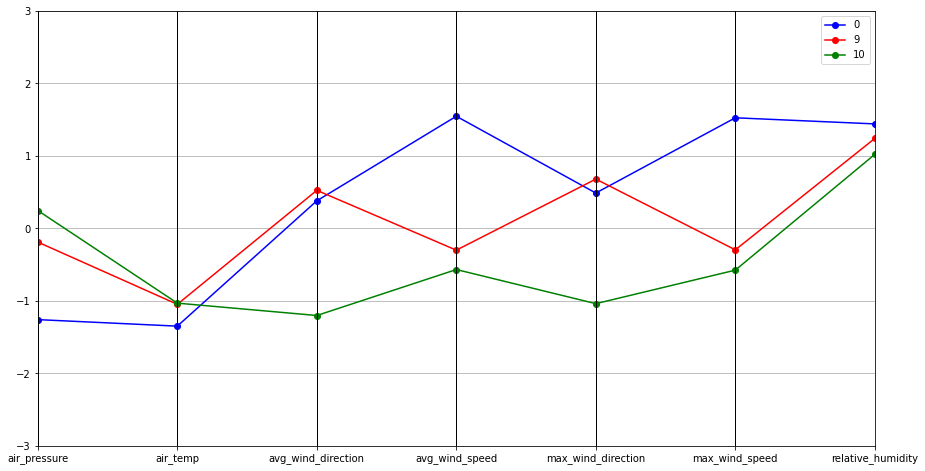

In [ ]:
#cool_days
parallel_plot(p[(p['relative_humidity']>0.5)& (p['air_temp']<0.5)],p)

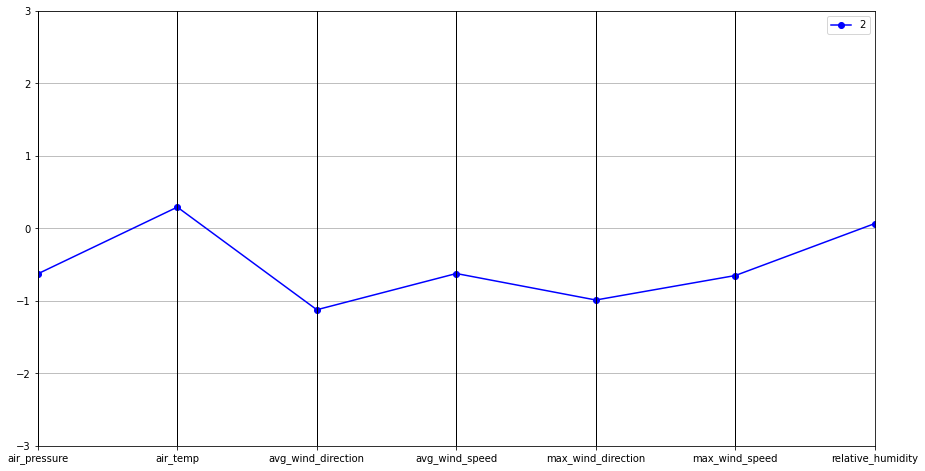

In [ ]:
parallel_plot(p.iloc[[2]],p)